<a href="https://colab.research.google.com/github/nikibhatt/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/NB_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error # 0.3 error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('googleplaystore.csv')


In [0]:
# Data cleaning for "Size" column
df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))
df['Size'] = df['Size'].map(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)
# Data cleaning for "Installs" column
df['Installs'] = df['Installs'].map(lambda x: x.rstrip('+'))
df['Installs'] = df['Installs'].map(lambda x: ''.join(x.split(',')))
# Data cleaning for "Price" column
df['Price'] = df['Price'].map(lambda x: x.lstrip('$').rstrip())
# Row 10472 removed due to missing value of Category
df.drop(df.index[10472], inplace=True)
# Row [7312,8266] removed due to "Unrated" value in Content Rating
df.drop(df.index[[7312,8266]], inplace=True)

In [0]:
# Sort by "Category"
df.sort_values("Category", inplace = True)

In [90]:
# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Content Rating NUM"] = lb_make.fit_transform(df["Content Rating"])
# Form dicitonary for Content Rating and numeric values 
dict_content_rating = {"Adults only 18+": 0, "Everyone": 1, "Everyone 10+": 2, "Mature 17+": 3, "Teen": 4}
# Numeric value for Content Rating
'''
Adults only 18+ = 0
Everyone = 1
Everyone 10+ = 2
Mature 17+ = 3
Teen = 4
'''
# Create column for "numeric" Category
df["Category NUM"] = lb_make.fit_transform(df["Category"])
# Form dicitonary for Category and numeric values
dict_category = {}
val = 0
for i in df["Category"].unique():
 dict_category[i] = val
 val += 1
# Numeric value for Category
'''
ART_AND_DESIGN = 0
AUTO_AND_VEHICLES = 1
BEAUTY = 2 
BOOKS_AND_REFERENCE = 3
BUSINESS = 4
COMICS = 5
COMMUNICATION = 6
DATING = 7
EDUCATION = 8
ENTERTAINMENT = 9
EVENTS = 10
FAMILY = 11
FINANCE = 12
FOOD_AND_DRINK = 13
GAME = 14
HEALTH_AND_FITNESS = 15
HOUSE_AND_HOME = 16
LIBRARIES_AND_DEMO = 17
LIFESTYLE = 18
MAPS_AND_NAVIGATION = 19
MEDICAL = 20
NEWS_AND_MAGAZINES = 21
PARENTING = 22
PERSONALIZATION = 23
PHOTOGRAPHY = 24
PRODUCTIVITY = 25
SHOPPING = 26
SOCIAL = 27
SPORTS = 28
TOOLS = 29
TRAVEL_AND_LOCAL = 30
VIDEO_PLAYERS = 31
WEATHER = 32
'''

# Label encoding
lb_make = LabelEncoder()
# Create column for "numeric" Content Rating 
df["Type NUM"] = lb_make.fit_transform(df["Type"])
# Form dicitonary for Content Rating and numeric values 
dict_type = {"Free": 0, "Paid": 1}
# Numeric value for Content Rating
'''
Free = 0
Paid = 1
'''

'\nFree = 0\nPaid = 1\n'

In [0]:
# Replace "NaN" with mean 
imputer = SimpleImputer()
df['Rating'] = imputer.fit_transform(df[['Rating']])
# Rounding the mean value to 1 decimal place
df['Rating'].round(1)
df.dropna(axis=0, inplace=True)

In [0]:
# Change datatype
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Installs'] = pd.to_numeric(df['Installs'])
df['Price'] = pd.to_numeric(df['Price'])

In [0]:
# Seperating teen data for comparisons

df_teen = df.loc[df['Content Rating NUM'] == 4]

In [0]:
# For 1st analysis, shorten dataset to top 10 categories

df_grouped_by_category_num = df.groupby('Category NUM')
options = ['GAME', 'FAMILY', 'COMMUNICATION', 'NEWS_AND_MAGAZINES', 'TOOLS', 'PRODUCTIVITY', 'PHOTOGRAPHY', 'SHOPPING', 'SPORTS', 'PERSONALIZATION']
short_df = df[df['Category'].isin(options)]

df_grouped_by_category_num_teen = df_teen.groupby('Category NUM').agg({'Installs':sum}).sort_values(by='Installs')
options_teen = ['PERSONALIZATION', 'PHOTOGRAPHY', 'SOCIAL', 'VIDEO_PLAYERS', 'ENTERTAINMENT', 'SHOPPING', 'FAMILY', 'COMMUNICATION', 'GAME', 'NEWS_AND_MAGAZINES']
short_df_teen = df_teen[df_teen['Category'].isin(options)]

In [0]:
# Calculate the sum installs for top 10 categories

df_sum_installs_for_category = []
for x in short_df['Category NUM'].unique():
  df_sum_installs_for_category.append({'Category NUM': x, 'Sum Installs' : df.loc[df['Category NUM'] == int(x), 'Installs'].sum()})
df_sum_installs_for_category = pd.DataFrame(df_sum_installs_for_category)

df_sum_installs_for_category_teen = []
for x in short_df_teen['Category NUM'].unique():
  df_sum_installs_for_category_teen.append({'Category NUM': x, 'Sum Installs' : short_df_teen.loc[df['Category NUM'] == int(x), 'Installs'].sum()})
df_sum_installs_for_category_teen = pd.DataFrame(df_sum_installs_for_category_teen)

In [0]:
# For better plotting, replace Category NUM with Category names

def find_cat(row):
   if int(row['Category NUM']) == 14 :
      return 'GAME'
   if int(row['Category NUM']) == 11 :
      return 'FAMILY'
   if int(row['Category NUM']) == 6 :
      return 'COMMUNICATION'
   if int(row['Category NUM']) == 21:
      return 'NEWS_AND_MAGAZINES'
   if int(row['Category NUM'])  == 29:
      return 'TOOLS'
   if int(row['Category NUM']) == 25:
      return 'PRODUCTIVITY'
   if int(row['Category NUM']) == 24:
      return 'PHOTOGRAPHY'
   if int(row['Category NUM']) == 26:
      return 'SHOPPING'
   if int(row['Category NUM']) == 28:
      return 'SPORTS'
   if int(row['Category NUM']) == 23:
      return 'PERSONALIZATION'    
   if int(row['Category NUM']) == 27:
      return 'SOCIAL' 
   if int(row['Category NUM']) == 31:      
      return 'VIDEO_PLAYERS'
   if int(row['Category NUM']) == 9:      
      return 'ENTERTAINMENT'      
   return 'Other'



In [0]:
df_sum_installs_for_category['Category'] = df_sum_installs_for_category.apply(lambda row: find_cat(row), axis=1)
df_sum_installs_for_category_teen['Category'] = df_sum_installs_for_category_teen.apply(lambda row: find_cat(row), axis=1)

In [0]:
df_sum_installs_for_category.plot.pie(y='Sum Installs', labels=df_sum_installs_for_category['Category'])

In [0]:
df_sum_installs_for_category_teen.plot.pie(y='Sum Installs', labels=df_sum_installs_for_category_teen['Category'])

In [0]:
# for price based analysis

df_price_distribution = []
for x in short_df['Price'].unique():
  df_price_distribution.append({'Price' : x, 'Number of Apps': len(short_df.loc[df['Price'] == x])})
df_price_distribution = pd.DataFrame(df_price_distribution)
df_price_distribution.sort_values(by=['Number of Apps'], ascending=False, inplace=True)

df_price_distribution_teen = []
for x in short_df_teen['Price'].unique():
  df_price_distribution_teen.append({'Price' : x, 'Number of Apps': len(short_df_teen.loc[df['Price'] == x])})
df_price_distribution_teen = pd.DataFrame(df_price_distribution_teen)
df_price_distribution_teen.sort_values(by=['Number of Apps'], ascending=False, inplace=True)

In [0]:
# for better graphing, make shorter dataframe

short_df_price = df_price_distribution[df_price_distribution['Number of Apps'] >= 5]
short_df_price = pd.DataFrame(short_df_price)

short_df_price_teen = df_price_distribution_teen[df_price_distribution_teen['Number of Apps'] >= 5]
short_df_price_teen = pd.DataFrame(short_df_price_teen)

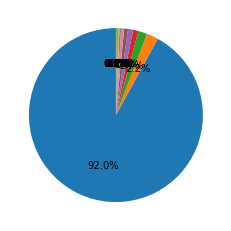

In [88]:
plt.pie(short_df_price['Number of Apps'],  startangle=90, autopct='%.1f%%');

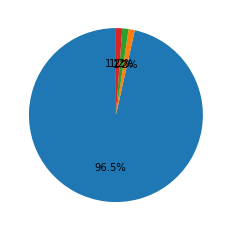

In [89]:
plt.pie(short_df_price_teen['Number of Apps'],  startangle=90, autopct='%.1f%%');

In [0]:
df_free_paid = df.groupby(['Type NUM'], sort=False).size().reset_index(name='Count')
df_free_paid_teen = df_teen.groupby(['Type NUM'], sort=False).size().reset_index(name='Count')

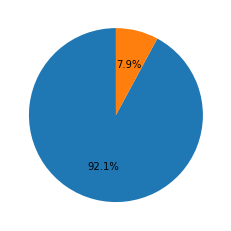

In [103]:
plt.pie(df_free_paid['Count'],  startangle=90, autopct='%.1f%%');

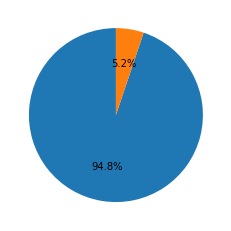

In [104]:
plt.pie(df_free_paid_teen['Count'],  startangle=90, autopct='%.1f%%');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


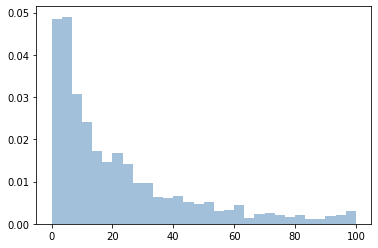

In [108]:
# for Size related analysis

Sizes = pd.to_numeric(df['Size'])
plt.hist(Sizes, bins=30, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


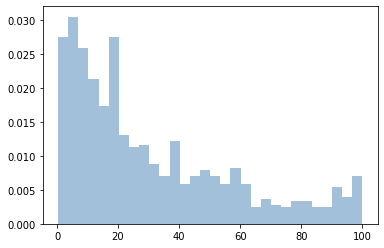

In [107]:
Sizes_teen = pd.to_numeric(df_teen['Size'])
plt.hist(Sizes_teen, bins=30, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue');